In [2]:
import numpy as np
import h5py
import cv2
import os, sys
import argparse

import matplotlib.pyplot as plt

from scipy.ndimage import median_filter
from skimage.metrics import *
%load_ext autoreload
%autoreload 2

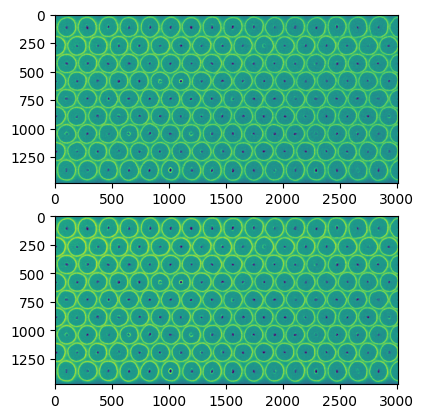

In [3]:
clean_imgpath = "/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned_ordered/SET01/F64_02.png"
clean_img = cv2.imread(clean_imgpath,cv2.IMREAD_GRAYSCALE)/255.
img_filename = "F32_02.png"
noisy_imgpath = "/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned_ordered/SET01/F32_02.png"
noisy_img = cv2.imread(noisy_imgpath,cv2.IMREAD_GRAYSCALE)/255.
plt.subplot(211)
plt.imshow(noisy_img)
plt.subplot(212)
plt.imshow(clean_img)

In [4]:
noisy_img.min(), noisy_img.max()

(0.0, 1.0)

In [5]:
noisy_img = np.expand_dims(noisy_img,axis=0)
clean_img = np.expand_dims(clean_img,axis=0)

In [6]:
num_repeat = 32*8
noisy_img = np.repeat(noisy_img, repeats=num_repeat, axis=0)
clean_img = np.repeat(clean_img, repeats=num_repeat, axis=0)
print(clean_img.shape, noisy_img.shape)

(256, 1474, 3010) (256, 1474, 3010)


In [7]:
import h5py
with h5py.File(f"one_img_SET01_F32_02_x{num_repeat}.hdf5",'w') as f:
    f.create_dataset('noisy_images', noisy_img.shape, dtype='f', data=noisy_img)
    f.create_dataset('clean_images', clean_img.shape, dtype='f', data=clean_img)